In [8]:
import pandas as pd
import seaborn  as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("Health_heart_experimental.csv")

The above line reads .csv file into DF(DATA FRAME)

In [10]:
df.head()


,Unnamed: 0,age,sex,SysBP,DiaBP,HR,weightKg,heightCm,BMI,indication
0,0,64,1,141,96,128,69,147,32.0,1
1,1,21,1,109,100,106,48,150,21.0,0
2,2,30,0,112,73,126,69,183,21.0,0
3,3,35,1,106,90,130,45,149,20.0,0
4,4,39,0,140,90,112,92,166,33.0,1


#LINE

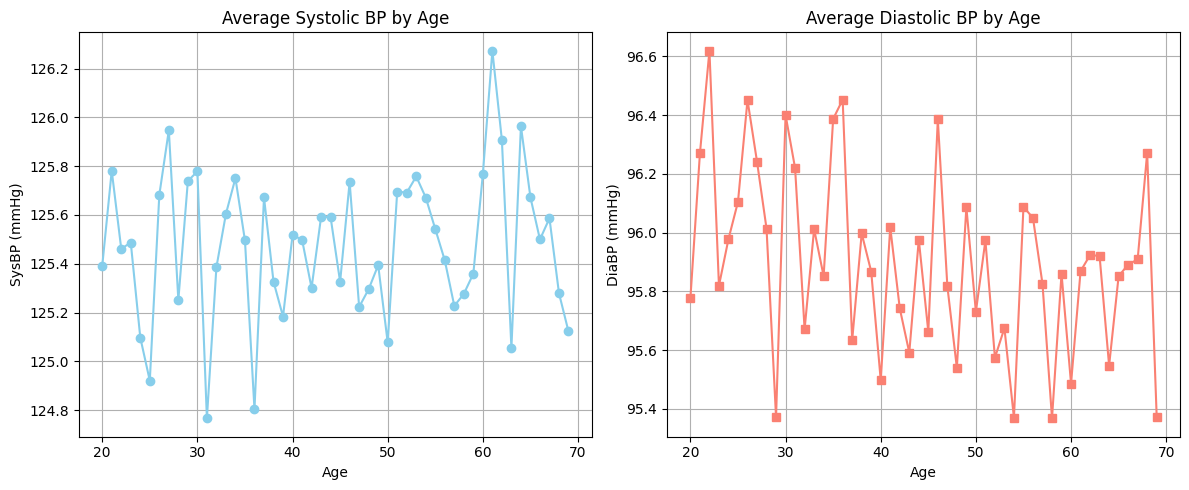

In [11]:
# Group by age and calculate averages
age_bp = df.groupby("age")[["SysBP", "DiaBP"]].mean()

# Create subplots: 1 row, 2 columns (side by side)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot SysBP vs Age (left side)
axes[0].plot(age_bp.index, age_bp["SysBP"], color="skyblue", marker="o")
axes[0].set_title("Average Systolic BP by Age")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("SysBP (mmHg)")
axes[0].grid(True)

# Plot DiaBP vs Age (right side)
axes[1].plot(age_bp.index, age_bp["DiaBP"], color="salmon", marker="s")
axes[1].set_title("Average Diastolic BP by Age")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("DiaBP (mmHg)")
axes[1].grid(True)

# Adjust layout so titles/labels don’t overlap
plt.tight_layout()
plt.show()


The line graph shows how systolic blood pressure changes with age. Older people generally have higher blood pressure, while younger people have lower values. Although the graph fluctuates, the overall pattern suggests blood pressure rises as age increases.
In contrast, the diastolic blood pressure line remains relatively stable during younger ages, showing little variation. However, as age increases into older groups, diastolic pressure tends to decline, resulting in lower values compared to middle age. This pattern highlights how systolic and diastolic pressures behave differently across the lifespan.




#Bar Graph


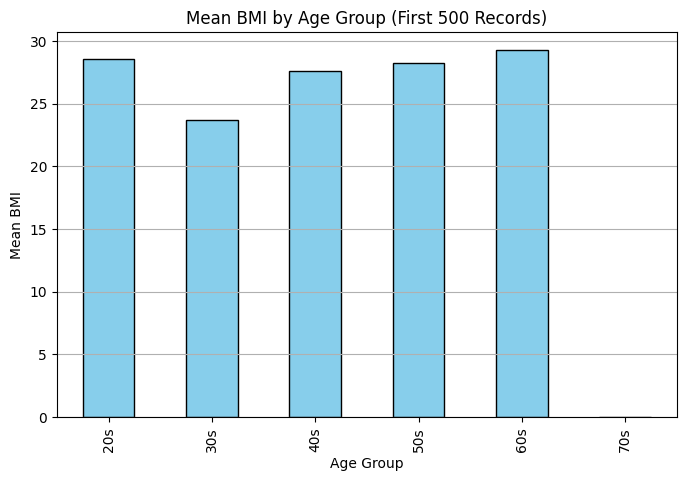

In [40]:

df_first500 = df.head(60).copy()   

df_first500["age_group"] = pd.cut(df_first500["age"], 
                                  bins=range(20, 90, 10),    
                                  labels=[f"{i}s" for i in range(20, 80, 10)])

age_bmi_means = df_first500.groupby("age_group", observed=False)["BMI"].mean()

plt.figure(figsize=(8,5))
age_bmi_means.plot(kind="bar", color="skyblue", edgecolor="black")

plt.xlabel("Age Group")
plt.ylabel("Mean BMI")
plt.title("Mean BMI by Age Group (First 500 Records)")
plt.grid(axis="y")
plt.show()

The above graph shows how average BMI changes with age. At around age 20, BMI is higher, close to 27. It then decreases gradually until about age 40, which may reflect people being more active and taking better care of themselves during early adulthood. After 40, BMI begins to rise again, likely because many pay less attention to diet, exercise, and overall self-care as they get older. This pattern highlights how changes in personal habits across life stages influence body weight.


#Pie-Chart

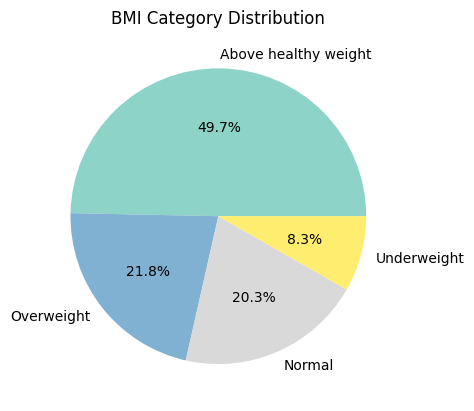

In [ ]:



df["BMI_category"] = pd.cut(df["BMI"], bins=[0,18.5,24.9,29.9,100], 
                            labels=["Underweight","Normal","Overweight","Above healthy weight"])

df["BMI_category"].value_counts().plot(kind="pie", autopct="%1.1f%%", colormap="Set3")

plt.title("BMI Category Distribution")
plt.ylabel("")
plt.show()

The chart shows how people are divided into different BMI categories. Nearly half of the group, about 49.7%, fall into the “Above healthy weight” category, suggesting many individuals carry more weight than is considered healthy. Around 21.8% are “Overweight,” while 20.3% are in the “Normal” range, showing a smaller portion with balanced body weight. Only 8.3% are “Underweight,” making it the least common category. Overall, the chart highlights that most individuals in this dataset are above the healthy BMI range, reflecting lifestyle and self-care habits that may influence body weight.